<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/n232-Interpretable-ML-II%20/%20n232a_Interpretable_ML_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

#### **N231 Part.2 모델 학습 부분까지 동일하게 과제를 수행합니다.**

In [1]:
!pip install category_encoders 
!pip install eli5 
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.3 MB/s 
     |████████████████████████████████| 133 kB 54.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=738000714e3d03b73c41e96c2bd582ec8bbd48549b6e02292e8aa3a98f3489d6
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requir

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from pdpbox.pdp import pdp_isolate, pdp_plot

## **Part 1. 데이터 준비**

- 어제 사용했던 데이터셋을 불러오세요.

- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [3]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

In [4]:
df.Attrition.str.replace('No','0').str.replace('Yes','1')

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: object

In [5]:
feature = df.columns.drop('Attrition').tolist()
target = 'Attrition'

x = df[feature]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

In [6]:
from sklearn.model_selection import cross_val_score
rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state = 42,
        n_jobs = -1,
        max_depth = 3
    )
)
rf.fit(x_train, y_train)
x_test = rf[0].transform(x_test)
rf.predict(x_test)
cv = cross_val_score(
    rf,
    x_train,
    y_train,
    cv = 10,
    n_jobs = -1,
    scoring = 'roc_auc'
)
avg_cv = cv.mean()

## **Part 3. ICE PLOT**

- Test Set의 `100번째 샘플`을 사용해서 ICE Plot을 그려보세요.

- 아래 특성들에 대한 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보이는 특성을 찾아보세요.

>`'JobSatisfaction'`

> `'DistanceFromHome'`

> `'JobInvolvement'`
 
> `'TotalWorkingYears'`

##### **Q1. Test Set의 100번째 샘플로 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보여주는 특성을 모두 고르세요.**

In [7]:
x_test.iloc[[100]]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
270,55,1,452,1,1,3,4,1,374,4,...,3,80,0,37,2,3,36,10,4,13


In [8]:
target_point = x_test.iloc[[100]]  # 특정 행 지정
                                   # 지정한 행의 특성 1개의 최소 ~ 최대값 범위
target_range = range(x_test['JobSatisfaction'].min(), x_test['JobSatisfaction'].max()+1)

results = []

for a in target_range:
    target_point['JobSatisfaction'] = a                     # 특정 행의 특성 값을 최소~ 최대값으로 넣음          
    x_test_pred_proba = rf.predict_proba(target_point)[:,1] # 특정 행의 특성 값이 변할 때 예측치
    results.append(x_test_pred_proba)

results = np.array(results)  
results -= results[0]        # results - results[0] 시작값에서의 변화량으로 전환(점점 작아짐)

Text(0, 0.5, 'pred_proba')

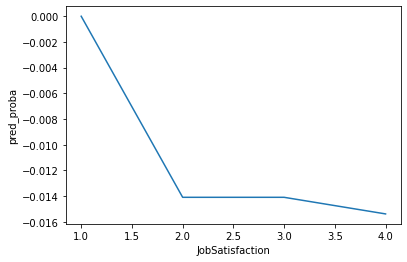

In [9]:
plt.plot(target_range, results)
plt.xlabel("JobSatisfaction")
plt.ylabel("pred_proba")

In [10]:
target_point = x_test.iloc[[100]]

target_feature_range = range(x_test['DistanceFromHome'].min(), x_test['DistanceFromHome'].max())
result = []

for b in target_feature_range:
    target_point['DistanceFromHome'] = b
    x_test_pred_proba = rf.predict_proba(target_point)[:,1]
    result.append(x_test_pred_proba)

result = np.array(result)
result -= result[0]

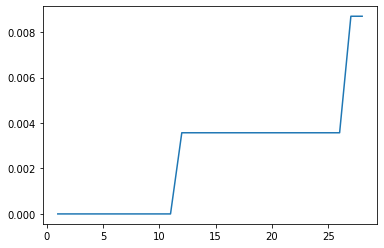

In [11]:
plt.plot(target_feature_range, result)

In [15]:
target_point = x_test.iloc[[100]]

results = []

target_feature_range = range(x_test['JobInvolvement'].min(), x_test['JobInvolvement'].max()+1)

for c in target_feature_range:
    target_point['JobInvolvement'] = c
    x_test_pred_proba = rf.predict_proba(target_point)[:,1]
    results.append(x_test_pred_proba)

results = np.array(results)
results -= results[0]

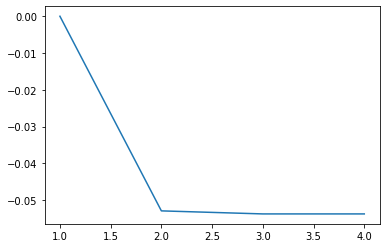

In [16]:
plt.plot(target_feature_range, results)

In [30]:
range(37, 37)

range(37, 37)

In [31]:
results = []

target_feature_range = range(x_test['TotalWorkingYears'].min(), x_test['TotalWorkingYears'].max()+1)

for d in target_feature_range:
    target_point['TotalWorkingYears'] = d
    x_test_pred_proba = rf.predict_proba(target_point)[:, 1]
    results.append(x_test_pred_proba)

results = np.array(results)
results -= results[0]

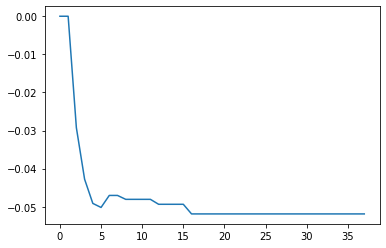

In [32]:
plt.plot(target_feature_range, results)

## **Part 4. PDP PLOT**

- `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하세요.


In [ ]:
plt.rcParams['figure.dpi'] = 144

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbc0282cf90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbbff04bd50>})

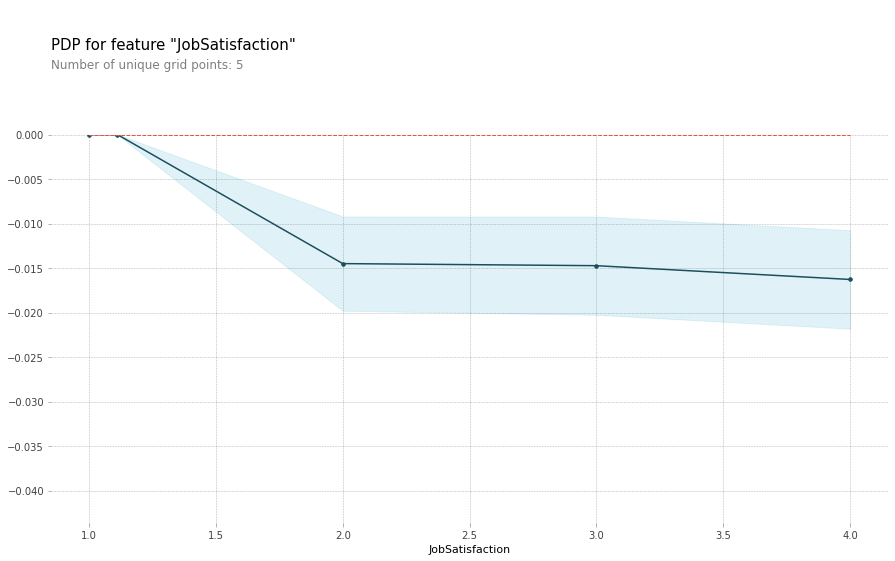

In [110]:
from pdpbox.pdp import pdp_isolate, pdp_plot # pdpbox 하나의 특성에 대한 pdp시각화

target_feature = "JobSatisfaction"           # 특성 선택

isolated= pdp_isolate(              # pdp모델
    model = rf,                     # 모델
    dataset = x_test,               # x데이터
    model_features= x_test.columns, # 특성 목록
    feature = target_feature,       # 분석할 특성
    grid_type = "percentile",       # 격차의 점 간격 설정(equal 개수만큼 동일하게 구분)
    num_grid_points = 10,           # 점의 갯수(type에 따라 달라짐 equal이면 균등격차로 점찍힘)
    # cust_grid_points=[-2, 1, 2, 3, 4, 5, 6, 7],  # 특성값을 찍어 볼 지점을 직접 지정
)
pdp_plot(isolated,                      # pdp plot (파란색은 신뢰구간)
         feature_name = target_feature) # 그래프 위에축 이름

##### **Q2. `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하기 위해 아래 빈칸을 채워보세요.**

> Test Set를 사용해서 PDP plot을 그려보면 `Job satisfaction` 특성 값이 변화함에 따라 타겟값이 전체적으로 _____하는 경향성을 보인다.
1. 상승
2. 하락

  

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbc02446850>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbc023f4150>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbc023a6650>}})

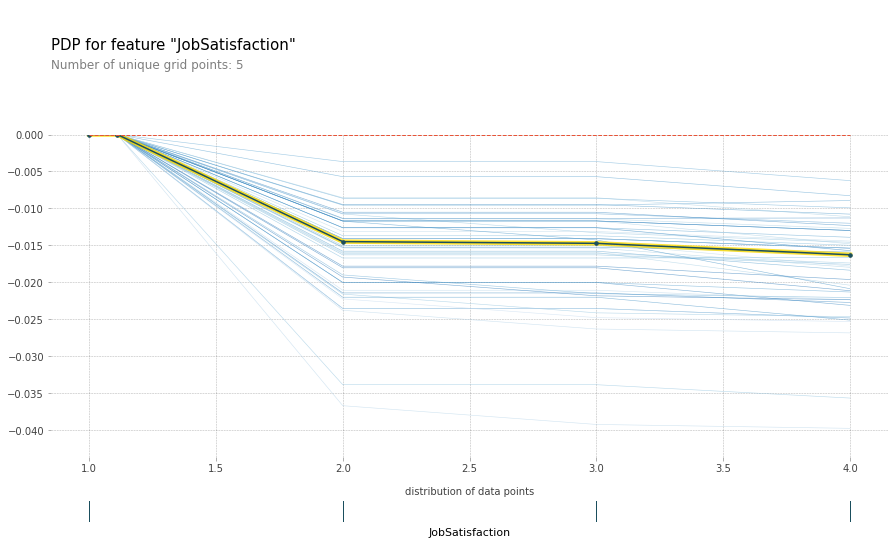

In [111]:
pdp_plot(                 
    isolated,                      # isolate 함수(pdp함수)
    feature_name = target_feature, # 그래프 위,아래 표시할 feature name
    plot_lines = True,    # 개별라인 표시 여부(노란색)
    frac_to_plot = 50,    # 표시할 ice plot 수
    plot_pts_dist=True    # rug plot(데이터의 밑에 수량바) 데이터 분포 표시
)

In [88]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot # 2- feature pdp

In [90]:
target_features = ['JobInvolvement','TotalWorkingYears']

ineraction =pdp_interact(     # 2개의 특성 pdp
    model = rf,
    dataset = x_test,    
    model_features = x_test.columns,
    features = target_features,    
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbbffbee190>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbbffbaa290>})

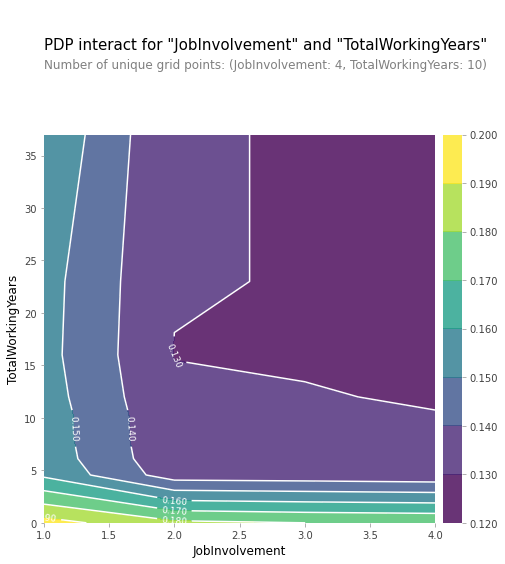

In [148]:
pdp_interact_plot(ineraction,           # 히트맵으로 나타남
                  plot_type=  'contour',# 그래프 방식 'grid'는 히트맵
                  feature_names = target_features)

In [ ]:
mappings = rf[0].mapping  # 인코딩 된 모든 값들 보기 (rf[0]가 오디널인코딩)
print(mappings)

In [104]:
mapping_data = list(filter(lambda x: x["col"] == 'Gender', mappings)) # 특정 특성 인코딩 값 보기
print(mapping_data)

[{'col': 'Gender', 'mapping': Male      1
Female    2
NaN      -2
dtype: int64, 'data_type': dtype('O')}]


In [125]:
maps = mapping_data[0]["mapping"] # mapping 부분만 추출
print(type(maps))

<class 'pandas.core.series.Series'>


In [146]:
original_value = maps.index.tolist()  # 범주형 인코딩 전 값
encoding_value = maps.values.tolist() # 범주형 인코딩 후 값

print(encoding_value, original_value)

[1, 2, -2] ['Male', 'Female', nan]


([<matplotlib.axis.XTick at 0x7fbc01d3fb50>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female'), Text(0, 0, 'nan')])

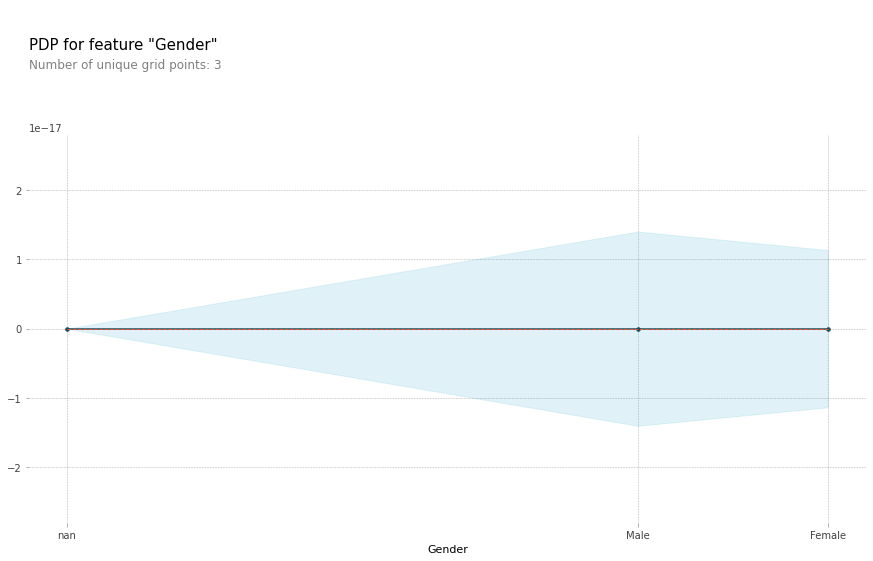

In [147]:
pdp_dist = pdp_isolate(
    rf,
    x_test,
    model_features=x_test.columns,
    feature = 'Gender',
    cust_grid_points = [-2, 1, 2],          # x값 지정
)
pdp_plot(pdp_dist, 'Gender')
plt.xticks(encoding_value, original_value)  # x축에 특성 표시

# 🥇 **도전 과제**

## **Part 5. 프로젝트 준비**

> #### **이번 도전과제는 n231에 이어서 진행해보세요.**

- 지난 도전과제에서 지시한 바와 같이 프로젝트에 사용할 데이터셋을 불러오세요. 

- 모델링을 수행한 후 순열중요도를 구하고 상위 특성만 사용해서 모델을 최적화 해보세요.

- PDP를 사용해서 모델을 들여다보고 해석해보세요.